In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv('/content/upi_transactions_2024.csv',engine='python',on_bad_lines='skip')
df

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,2024-10-08 15:17:28,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0.0,15,Tuesday,0.0
1,TXN0000000002,2024-04-11 06:56:00,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0.0,6,Thursday,0.0
2,TXN0000000003,2024-04-02 13:27:18,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0.0,13,Tuesday,0.0
3,TXN0000000004,2024-01-07 10:09:17,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0.0,10,Sunday,1.0
4,TXN0000000005,2024-01-23 19:04:23,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0.0,19,Tuesday,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332928,TXN0000249996,2024-11-08 22:41:43,Recharge,Food,373,SUCCESS,36-45,26-35,Telangana,ICICI,HDFC,iOS,5G,0.0,22,Friday,0.0
332929,TXN0000249997,2024-12-15 02:58:03,P2P,Utilities,2025,SUCCESS,36-45,26-35,Rajasthan,HDFC,Yes Bank,Android,5G,0.0,2,Sunday,1.0
332930,TXN0000249998,2024-11-27 16:33:25,P2P,Food,468,SUCCESS,26-35,18-25,West Bengal,ICICI,ICICI,Android,4G,0.0,16,Wednesday,0.0
332931,TXN0000249999,2024-01-05 13:31:30,Recharge,Healthcare,284,SUCCESS,18-25,36-45,Andhra Pradesh,Axis,ICICI,iOS,4G,0.0,13,Friday,0.0


In [ ]:
df.shape

(332933, 17)

In [ ]:
df.head()

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,2024-10-08 15:17:28,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0.0,15,Tuesday,0.0
1,TXN0000000002,2024-04-11 06:56:00,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0.0,6,Thursday,0.0
2,TXN0000000003,2024-04-02 13:27:18,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0.0,13,Tuesday,0.0
3,TXN0000000004,2024-01-07 10:09:17,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0.0,10,Sunday,1.0
4,TXN0000000005,2024-01-23 19:04:23,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0.0,19,Tuesday,0.0


In [ ]:
df.tail()

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
332928,TXN0000249996,2024-11-08 22:41:43,Recharge,Food,373,SUCCESS,36-45,26-35,Telangana,ICICI,HDFC,iOS,5G,0.0,22,Friday,0.0
332929,TXN0000249997,2024-12-15 02:58:03,P2P,Utilities,2025,SUCCESS,36-45,26-35,Rajasthan,HDFC,Yes Bank,Android,5G,0.0,2,Sunday,1.0
332930,TXN0000249998,2024-11-27 16:33:25,P2P,Food,468,SUCCESS,26-35,18-25,West Bengal,ICICI,ICICI,Android,4G,0.0,16,Wednesday,0.0
332931,TXN0000249999,2024-01-05 13:31:30,Recharge,Healthcare,284,SUCCESS,18-25,36-45,Andhra Pradesh,Axis,ICICI,iOS,4G,0.0,13,Friday,0.0
332932,TXN0000250000,2024-01-17 15:23:07,P2P,Entertainment,531,SUCCESS,18-25,26-35,Telangana,Axis,Yes Bank,Android,4G,0.0,15,Wednesday,0.0


In [ ]:
df.columns

Index(['transaction id', 'timestamp', 'transaction type', 'merchant_category',
       'amount (INR)', 'transaction_status', 'sender_age_group',
       'receiver_age_group', 'sender_state', 'sender_bank', 'receiver_bank',
       'device_type', 'network_type', 'fraud_flag', 'hour_of_day',
       'day_of_week', 'is_weekend'],
      dtype='object')

In [ ]:
df.dtypes

,0
transaction id,object
timestamp,object
transaction type,object
merchant_category,object
amount (INR),object
transaction_status,object
sender_age_group,object
receiver_age_group,object
sender_state,object
sender_bank,object


In [ ]:
df.isna().sum()

,0
transaction id,0
timestamp,0
transaction type,1
merchant_category,1
amount (INR),1
transaction_status,1
sender_age_group,1
receiver_age_group,2
sender_state,2
sender_bank,3


In [ ]:
df=df.dropna()
df

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,2024-10-08 15:17:28,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0.0,15,Tuesday,0.0
1,TXN0000000002,2024-04-11 06:56:00,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0.0,6,Thursday,0.0
2,TXN0000000003,2024-04-02 13:27:18,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0.0,13,Tuesday,0.0
3,TXN0000000004,2024-01-07 10:09:17,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0.0,10,Sunday,1.0
4,TXN0000000005,2024-01-23 19:04:23,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0.0,19,Tuesday,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332928,TXN0000249996,2024-11-08 22:41:43,Recharge,Food,373,SUCCESS,36-45,26-35,Telangana,ICICI,HDFC,iOS,5G,0.0,22,Friday,0.0
332929,TXN0000249997,2024-12-15 02:58:03,P2P,Utilities,2025,SUCCESS,36-45,26-35,Rajasthan,HDFC,Yes Bank,Android,5G,0.0,2,Sunday,1.0
332930,TXN0000249998,2024-11-27 16:33:25,P2P,Food,468,SUCCESS,26-35,18-25,West Bengal,ICICI,ICICI,Android,4G,0.0,16,Wednesday,0.0
332931,TXN0000249999,2024-01-05 13:31:30,Recharge,Healthcare,284,SUCCESS,18-25,36-45,Andhra Pradesh,Axis,ICICI,iOS,4G,0.0,13,Friday,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = lab.fit_transform(df[col])
df

/tmp/ipython-input-83417693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = lab.fit_transform(df[col])
/tmp/ipython-input-83417693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = lab.fit_transform(df[col])
/tmp/ipython-input-83417693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,0,191652,2,1,9510,1,1,0,1,0,6,0,1,0.0,7,5,0.0
1,1,68756,1,4,66,1,1,1,8,2,0,2,1,0.0,20,4,0.0
2,2,62750,2,4,5782,1,1,2,3,7,5,0,1,0.0,5,5,0.0
3,3,4131,2,3,3563,1,1,1,1,2,5,0,2,0.0,2,3,1.0
4,4,15522,2,7,10299,1,1,0,1,0,7,2,3,0.0,11,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332928,249986,213270,3,2,4628,1,2,1,7,2,1,2,2,0.0,15,0,0.0
332929,249987,237839,2,9,2647,1,2,1,5,1,7,0,2,0.0,12,3,1.0
332930,249988,225749,2,2,5682,1,1,0,9,2,2,0,1,0.0,8,6,0.0
332931,249989,2915,3,5,3625,1,0,2,0,0,2,2,1,0.0,5,0,0.0


In [ ]:
x=df.drop('amount (INR)',axis=1)
y=df['amount (INR)']
df

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,0,191652,2,1,9510,1,1,0,1,0,6,0,1,0.0,7,5,0.0
1,1,68756,1,4,66,1,1,1,8,2,0,2,1,0.0,20,4,0.0
2,2,62750,2,4,5782,1,1,2,3,7,5,0,1,0.0,5,5,0.0
3,3,4131,2,3,3563,1,1,1,1,2,5,0,2,0.0,2,3,1.0
4,4,15522,2,7,10299,1,1,0,1,0,7,2,3,0.0,11,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332928,249986,213270,3,2,4628,1,2,1,7,2,1,2,2,0.0,15,0,0.0
332929,249987,237839,2,9,2647,1,2,1,5,1,7,0,2,0.0,12,3,1.0
332930,249988,225749,2,2,5682,1,1,0,9,2,2,0,1,0.0,8,6,0.0
332931,249989,2915,3,5,3625,1,0,2,0,0,2,2,1,0.0,5,0,0.0


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)

(266339, 16)
(266339,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=30,random_state=42)    #reduce trees
model.fit(X_train,y_train)



RandomForestClassifier(n_estimators=30, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))


Accuracy: 1.0


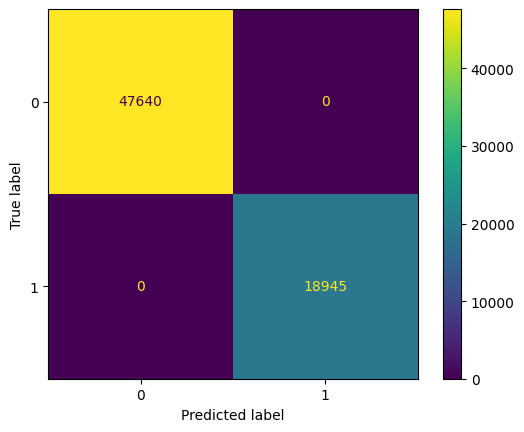

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     47640
         1.0       1.00      1.00      1.00     18945

    accuracy                           1.00     66585
   macro avg       1.00      1.00      1.00     66585
weighted avg       1.00      1.00      1.00     66585



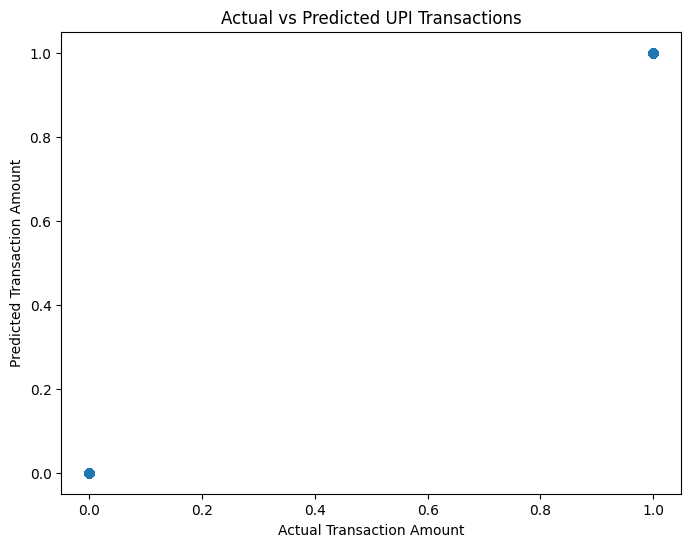

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Transaction Amount")
plt.ylabel("Predicted Transaction Amount")
plt.title("Actual vs Predicted UPI Transactions")
plt.show()